# Time Series   
In this notebook, I show how to do rolling average and detrend of a time series

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (12, 6)})
sns.set_context('talk')

In [2]:
# read data into a pandas dataframe
df = pd.read_csv('NH_seaice_extent_final_v2.csv')
df.columns = [col.strip() for col in df.columns.tolist()]
df = df.drop(0) # this is a descriptor row, not actual data
df = df.drop(['Missing','Source Data'], axis=1)
df.Extent = pd.to_numeric(df.Extent)
df.Year = pd.to_numeric(df.Year)
df.Month = pd.to_numeric(df.Month)
df.Day = pd.to_numeric(df.Day)
df.dtypes
pd_index=df.index

In [3]:
df.index = pd.to_datetime(df.loc[:, ['Year', 'Month', 'Day']])
del df['Year']
del df['Month']
del df['Day']
df.head()

,Extent
1978-10-26,10.231
1978-10-28,10.420
1978-10-30,10.557
1978-11-01,10.670
1978-11-03,10.777


In [4]:
monthly=df.groupby([(df.index.year),(df.index.month)]).mean()
monthly.reset_index(inplace=True)
monthly.columns=['Year','Month','Extent']
#monthly.Year = pd.to_numeric(monthly.Year)
#monthly.Month = pd.to_numeric(monthly.Month)
#monthly['Day']=1
#monthly.dtypes
monthly.head()

,Year,Month,Extent
0,1978,10,10.402667
1,1978,11,11.645133
2,1978,12,13.667063
3,1979,1,15.414000
4,1979,2,16.175286


In [5]:
# The next step works only for pd.Int64Index type, so we need to convert this
monthly.set_index(monthly.index.values)
#monthly.index = monthly.index.astype(pd.core.indexes.numeric.Int64Index) 
#monthly.index = monthly.index.astype(int)
monthly['Day']=1
monthly.index = pd.to_datetime(monthly.loc[:, ['Year', 'Month', 'Day']])
del monthly['Year']
del monthly['Month']
del monthly['Day']
monthly.head()

,Extent
1978-10-01,10.402667
1978-11-01,11.645133
1978-12-01,13.667063
1979-01-01,15.414000
1979-02-01,16.175286


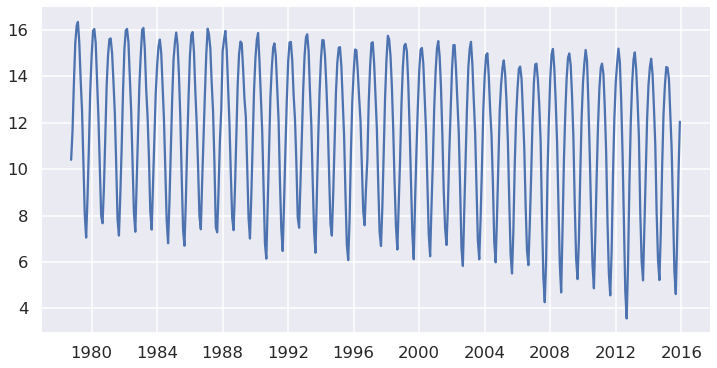

In [6]:
# plot ice extent over time
sns.set_context('talk')
#monthly.plot(x=monthly.index, y='Extent')
plt.plot(monthly)
sns.despine()

In [7]:
def plot_rolling_mean_std(df,win):
    """calculate rolling mean: win = size of window to calculate over
    the window should usually be at least the size of 
    your seasonal period (e.g., 12 months here)"""

    rollMean = df.Extent.rolling(window=win, center=False).mean()
    rollStd = df.Extent.rolling(window=win, center=False).std()

    # plot the rolling stats
    sns.set_context('talk')
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.plot(df.Extent, label='Raw Data')
    ax1.plot(rollMean, label='Rolling Mean')
    ax1.set_ylabel('Mean Extent')
    ax1.legend()
    ax2.plot(rollStd, label='Rolling Std')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Extent Std')
    sns.despine()

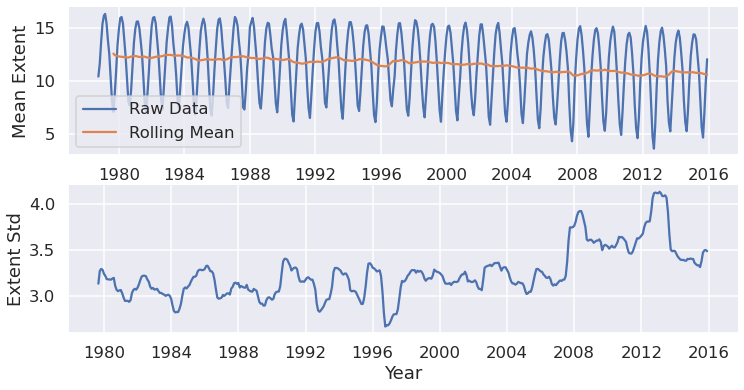

In [8]:
win = 12
plot_rolling_mean_std(monthly,win)

<a id='differencing'></a>
### Differencing to Detrend

Another common method for removing trend is differencing. In this technique, you just subtract from your time series the time series shifted by t-1. Much like demeaning, this operation leaves you with just the change across time, which  often leads to a stationary series. You can then just model that change and superimpose it back on the trend.

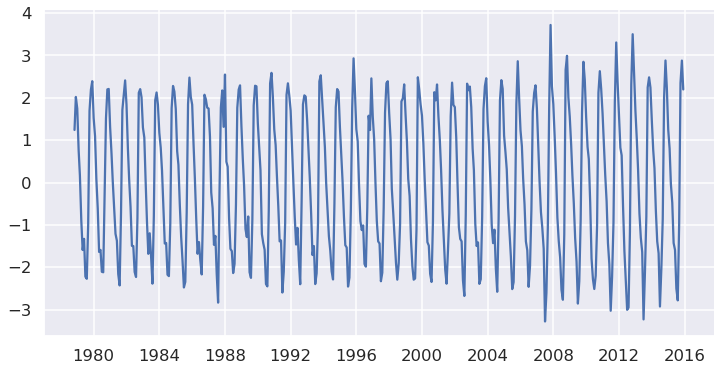

In [9]:
# construct difference curve and plot
diffed = monthly.Extent - monthly.Extent.shift()
diffed.dropna(inplace=True)
plt.plot(diffed)
sns.despine()